<div align="center">

# **Image Classification Model**

</div>

This Colab notebook showcases an image classification model trained to classify images into different categories. The model has been trained on a dataset comprising images from various classes, including **anacephaly**, **congi**, **down_syndrome**, **encephalocele**, and **placenta**.

<p align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/CRL_Crown_rump_length_12_weeks_ecografia_Dr._Wolfgang_Moroder.jpg?Ultrasound1163529084" alt="Image"  style="width: 640px; height: 480px;">
</p>

## Dataset

The dataset used for training, validation, and testing the model is loaded using the `tf.keras.utils.image_dataset_from_directory` function. It is organized in a directory structure where each class has its own subdirectory containing the corresponding images. The dataset is divided into training, validation, and test sets using a 70-20-10 split.

<br>

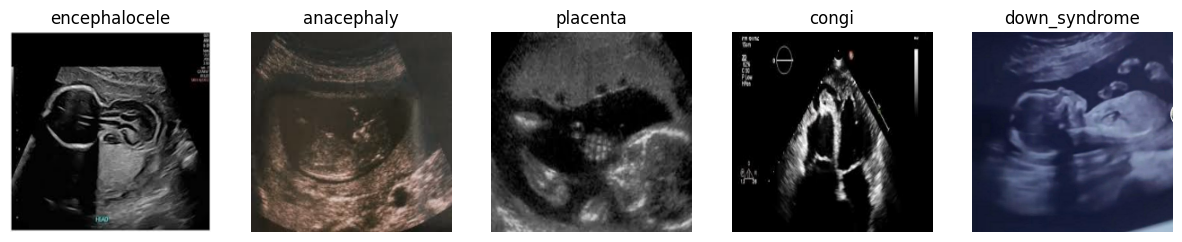


## Instructions

To run this notebook, you need to have the dataset organized in the appropriate directory structure as specified in the code. Additionally, ensure that the necessary dependencies are installed, including TensorFlow and scikit-learn.

Feel free to modify the code and experiment with different model architectures, hyperparameters, or evaluation techniques to further enhance the model's performance.

Let's get started with loading the dataset and building the image classification model!

# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [105]:
!unzip -q /content/data.zip -d /content/

replace /content/data/anacephaly/1.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/data/anacephaly/1.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/data/anacephaly/1.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/data/anacephaly/1.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/data/anacephaly/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: 

In [108]:
import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [109]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [110]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Remove dodgy images

In [113]:
import cv2
import imghdr

In [114]:
data_dir = '/content/data'

In [115]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [116]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [117]:
import numpy as np
from matplotlib import pyplot as plt

In [118]:
# Define the class names
class_names = ['anacephaly', 'congi', 'down_syndrome', 'encephalocele', 'placenta']

In [119]:
# Load the dataset with labels
data = tf.keras.utils.image_dataset_from_directory(
    "/content/data",
    labels="inferred",
    label_mode="int",
    class_names=class_names,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
)

Found 509 files belonging to 5 classes.


In [125]:
# Iterate over the dataset and extract one image from each class
samples_per_class = 1
sample_images = []
sample_labels = []

In [126]:
for images, labels in data:
    for i in range(len(images)):
        class_label = labels[i].numpy()
        if len(sample_images) < len(class_names) and class_label not in sample_labels:
            sample_images.append(images[i].numpy().astype("uint8"))
            sample_labels.append(class_label)
    if len(sample_images) >= len(class_names):
        break

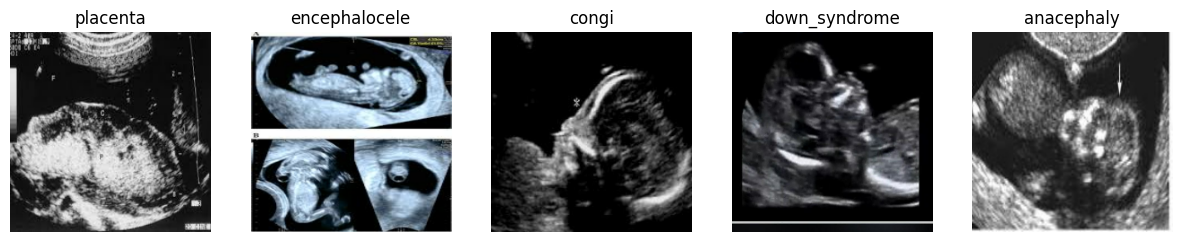

In [127]:
# Display the sample images from each class side by side
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))

for i in range(len(sample_images)):
    axes[i].imshow(sample_images[i])
    axes[i].set_title(class_names[sample_labels[i]])
    axes[i].axis("off")

plt.show()

In [128]:
data_iterator = data.as_numpy_iterator()

In [129]:
batch = data_iterator.next()

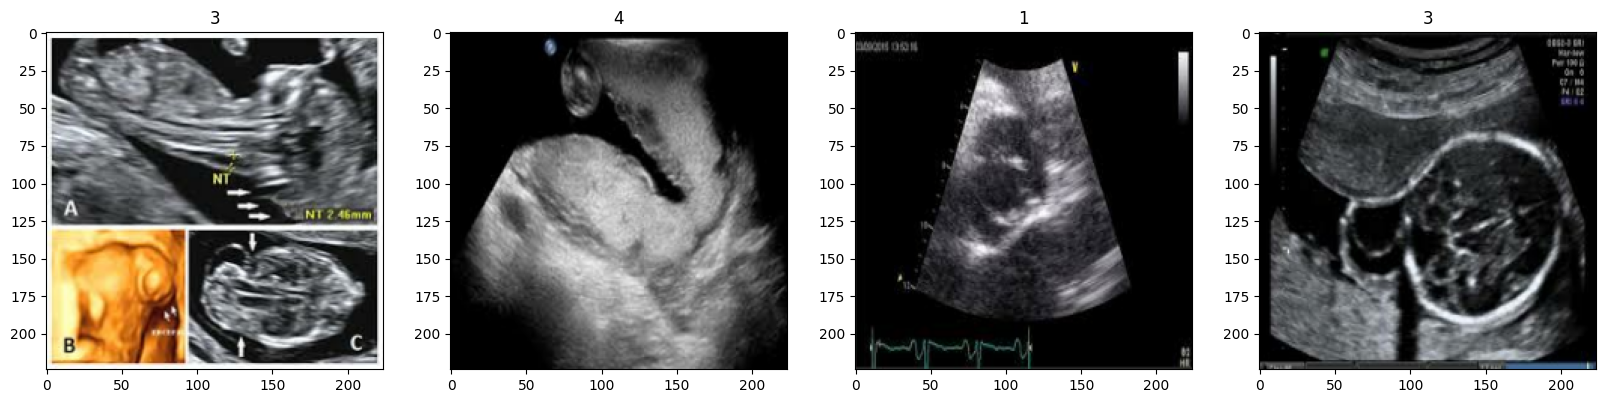

In [130]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [131]:
data = data.map(lambda x,y: (x/255, y))

In [132]:
data.as_numpy_iterator().next()

(array([[[[0.02352941, 0.02352941, 0.02352941],
          [0.02242647, 0.02242647, 0.02242647],
          [0.01960784, 0.01960784, 0.01960784],
          ...,
          [0.02352941, 0.02352941, 0.02352941],
          [0.02634804, 0.02634804, 0.02634804],
          [0.02745098, 0.02745098, 0.02745098]],
 
         [[0.02352941, 0.02352941, 0.02352941],
          [0.02242647, 0.02242647, 0.02242647],
          [0.01960784, 0.01960784, 0.01960784],
          ...,
          [0.02352941, 0.02352941, 0.02352941],
          [0.02634804, 0.02634804, 0.02634804],
          [0.02745098, 0.02745098, 0.02745098]],
 
         [[0.02352941, 0.02352941, 0.02352941],
          [0.02242647, 0.02242647, 0.02242647],
          [0.01960784, 0.01960784, 0.01960784],
          ...,
          [0.02352941, 0.02352941, 0.02352941],
          [0.02634804, 0.02634804, 0.02634804],
          [0.02745098, 0.02745098, 0.02745098]],
 
         ...,
 
         [[0.01960784, 0.01960784, 0.01960784],
          [0.01960

# 5. Split Data

In [133]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [134]:
train_size

11

In [135]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [136]:
# Resize the images to match the expected input shape
train_resized = train.map(lambda x, y: (tf.image.resize(x, (256, 256)), tf.one_hot(y, 5)))
val_resized = val.map(lambda x, y: (tf.image.resize(x, (256, 256)), tf.one_hot(y, 5)))
test_resized = test.map(lambda x, y: (tf.image.resize(x, (256, 256)), tf.one_hot(y, 5)))


# 6. Build Deep Learning Model

In [137]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [140]:
model = Sequential()

In [141]:

# Convolutional layers
model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(tf.keras.layers.Flatten())

# Fully connected layers
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [142]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [143]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 64)      

# 7. Train

In [144]:
logdir='logs'

In [145]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [146]:
hist = model.fit(train_resized, epochs=50, validation_data=val_resized, callbacks=[early_stopping])

Epoch 1/50
11/11 [==============================] - 5s 140ms/step - loss: 2.0857 - accuracy: 0.2642 - val_loss: 1.4346 - val_accuracy: 0.4479
Epoch 2/50
11/11 [==============================] - 4s 369ms/step - loss: 1.2892 - accuracy: 0.4858 - val_loss: 1.0293 - val_accuracy: 0.5521
Epoch 3/50
11/11 [==============================] - 3s 222ms/step - loss: 0.9642 - accuracy: 0.6364 - val_loss: 0.8096 - val_accuracy: 0.7812
Epoch 4/50
11/11 [==============================] - 2s 132ms/step - loss: 0.7058 - accuracy: 0.7642 - val_loss: 0.5566 - val_accuracy: 0.8229
Epoch 5/50
11/11 [==============================] - 2s 190ms/step - loss: 0.4237 - accuracy: 0.8636 - val_loss: 0.3670 - val_accuracy: 0.8646
Epoch 6/50
11/11 [==============================] - 2s 130ms/step - loss: 0.3963 - accuracy: 0.8665 - val_loss: 0.3024 - val_accuracy: 0.8958
Epoch 7/50
11/11 [==============================] - 2s 197ms/step - loss: 0.2140 - accuracy: 0.9432 - val_loss: 0.1721 - val_accuracy: 0.9375
Epoch 

# 8. Plot Performance

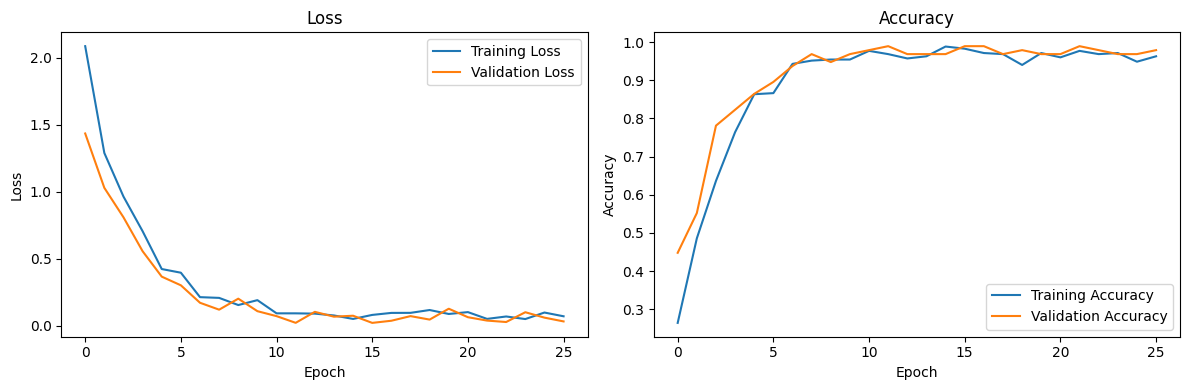

In [147]:

# Plot the training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Confusion Matrix

In [148]:
# Get the true labels and predicted labels
y_true = []
y_pred = []

for images, labels in test_resized:
    batch_pred = model.predict(images)
    batch_pred_labels = np.argmax(batch_pred, axis=1)
    y_pred.extend(batch_pred_labels)
    y_true.extend(np.argmax(labels, axis=1))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)


1/1 [==============================] - 0s 81ms/step


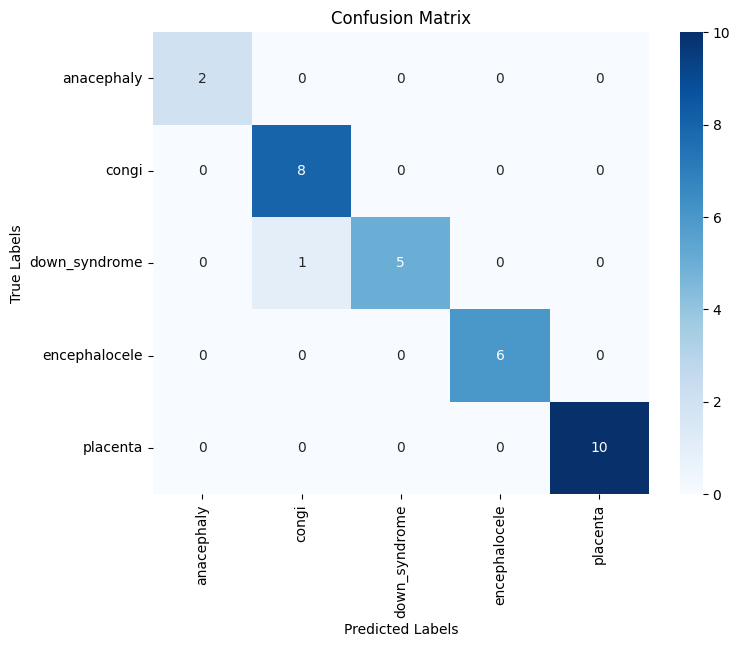

In [149]:

# Define the class names
class_names = ['anacephaly', 'congi', 'down_syndrome', 'encephalocele', 'placenta']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 10. Test

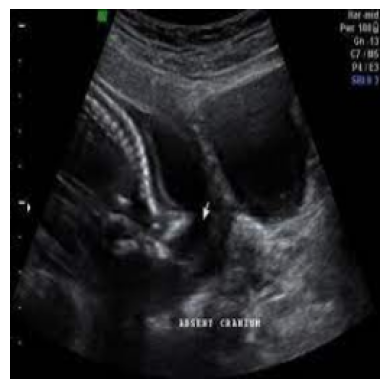

In [150]:
img = cv2.imread('anacephaly.jpg')
# Resize the image to match the expected input shape of the model
img = cv2.resize(img, (256, 256))
# Convert BGR to RGB color format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Remove axis ticks and labels
plt.show()

In [151]:
# Preprocess the image
input_image = np.expand_dims(img_rgb, axis=0)  # Add a batch dimension
input_image = input_image / 255.0  # Normalize the image

# Make predictions
predictions = model.predict(input_image)

1/1 [==============================] - 0s 190ms/step


In [152]:
predictions

array([[9.9211228e-01, 3.5412335e-03, 4.0125442e-04, 3.2983096e-03,
        6.4697419e-04]], dtype=float32)

In [153]:
# Get the predicted class labels
predicted_labels = tf.argmax(predictions, axis=1)

# Map the predicted labels to class names
predicted_class_names = [class_names[label] for label in predicted_labels]

# Print the predicted class names
print("Predicted Class Names:", predicted_class_names)

Predicted Class Names: ['anacephaly']


# 11. Save the Model

In [154]:
from tensorflow.keras.models import load_model

In [155]:
model.save(os.path.join('models','ultrasould.h5'))

In [101]:
#new_model = load_model('/content/models/ultrasould.h5')
#new_model.predict(###RESIZE RGB)